In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean,stdev
import math
import sys
import MDAnalysis as mda

In [2]:
colors = ["#003366" ,"#ff7518" ,"#ae0c00", "#4b0082", "#BCADE0","#177245" ,"#f4c430" ,"#89cff0"]

## Biotin

### Newest Code

In [60]:
def errors_BTN (df):
    SDs=[]
    RSDs=[]
    SEs=[]
    for i in range (0,len(df)):
        SDs.append(stdev(df.loc[i][1:4]))
        if df.loc[i]["Mean"]:
            RSDs.append(SDs[i]/df.loc[i]["Mean"]*100)
        else:
            RSDs.append(0)
        SEs.append(SDs[i]/math.sqrt(3))
    df["SD"]=SDs
    df["RSD"]=RSDs
    df["SE"]=SEs

In [4]:
! ls /media/php24iap/simulations/BTN

ls: cannot access '/media/php24iap/simulations/BTN': No such file or directory


In [5]:
df_BTN_500=pd.read_csv('BTN_500ns.csv')

In [6]:
errors_BTN(df_BTN_500)

NameError: name 'errors_BTN' is not defined

In [ ]:
df_BTN_500

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,9.084051e+01,90.766182,9.042923e+01,9.067864e+01,0.219172,0.241702,1.265390e-01
1,UA_Rovib,3.800000e-11,0.000002,1.190000e-09,6.110406e-07,0.000001,172.852121,6.097954e-07
2,UA_Conf,2.956779e+01,29.879568,2.984631e+01,2.976456e+01,0.171212,0.575221,9.884929e-02
3,Res_Transvib,4.149584e+01,41.203361,4.128424e+01,4.132781e+01,0.151029,0.365441,8.719655e-02
4,Res_Rovib,1.420093e+01,12.664303,1.499025e+01,1.395183e+01,1.182815,8.477845,6.828983e-01
5,Total,1.761051e+02,174.513416,1.765500e+02,1.757228e+02,1.070760,0.609346,6.182039e-01


In [ ]:
df_BTN_400=pd.read_csv('BTN_400ns.csv')
errors_BTN(df_BTN_400)
df_BTN_400

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,9.090603e+01,90.786496,9.054258e+01,9.074504e+01,0.185234,0.204125,1.069447e-01
1,UA_Rovib,2.030000e-10,0.000003,1.290000e-08,9.776438e-07,0.000002,172.055735,9.711564e-07
2,UA_Conf,2.964566e+01,29.773729,2.984348e+01,2.975429e+01,0.100333,0.337205,5.792724e-02
3,Res_Transvib,4.147874e+01,41.206825,4.124593e+01,4.131050e+01,0.147007,0.355859,8.487455e-02
4,Res_Rovib,1.366254e+01,12.788590,1.587237e+01,1.410783e+01,1.589385,11.265974,9.176317e-01
5,Total,1.756930e+02,174.555643,1.775044e+02,1.759177e+02,1.487149,0.845366,8.586058e-01


In [ ]:
df_BTN_300=pd.read_csv('BTN_300ns.csv')
errors_BTN(df_BTN_300)
df_BTN_300

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,9.069582e+01,9.091132e+01,9.059370e+01,9.073361e+01,1.621513e-01,0.178711,9.361810e-02
1,UA_Rovib,5.010000e-10,2.120000e-07,4.660000e-07,2.260167e-07,2.330726e-07,103.121863,1.345646e-07
2,UA_Conf,2.957959e+01,2.952099e+01,2.971761e+01,2.960606e+01,1.009460e-01,0.340964,5.828117e-02
3,Res_Transvib,4.134108e+01,4.116559e+01,4.111589e+01,4.120752e+01,1.183058e-01,0.287097,6.830386e-02
4,Res_Rovib,1.389609e+01,1.214848e+01,1.578574e+01,1.394343e+01,1.819094e+00,13.046241,1.050254e+00
5,Total,1.755126e+02,1.737464e+02,1.772129e+02,1.754906e+02,1.733384e+00,0.987736,1.000770e+00


In [ ]:
df_BTN_200=pd.read_csv('BTN_200ns.csv')
errors_BTN(df_BTN_200)
df_BTN_200

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,90.684490,91.512396,91.271627,91.156171,0.425858,0.467174,0.245869
1,UA_Rovib,0.000080,0.020000,0.000153,0.006729,0.011480,170.590921,0.006628
2,UA_Conf,29.275724,29.400514,29.498767,29.391668,0.111784,0.380326,0.064539
3,Res_Transvib,41.500812,40.997044,41.223434,41.240430,0.252314,0.611811,0.145673
4,Res_Rovib,13.680255,12.141519,16.541165,14.120980,2.232689,15.811150,1.289044
5,Total,175.141362,174.071427,178.535147,175.915979,2.330498,1.324779,1.345514


In [ ]:
df_BTN_100=pd.read_csv('BTN_100ns.csv')
errors_BTN(df_BTN_100)
df_BTN_100

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,91.753072,92.494442,91.745509,91.997674,0.430230,0.467654,0.248394
1,UA_Rovib,6.860000,0.021200,0.021500,2.300136,3.948296,171.654945,2.279550
2,UA_Conf,28.921207,28.813465,29.340352,29.025008,0.278358,0.959030,0.160710
3,Res_Transvib,41.563080,41.367181,41.238236,41.389499,0.163568,0.395192,0.094436
4,Res_Rovib,15.403879,11.776830,15.626096,14.268935,2.161084,15.145380,1.247703
5,Total,184.498917,174.473163,177.971676,178.981252,5.088553,2.843065,2.937877


In [ ]:
df_BTN_50=pd.read_csv('BTN_50ns.csv')
errors_BTN(df_BTN_50)
df_BTN_50

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,93.763420,93.499614,92.242982,93.168672,0.812450,0.872021,0.469068
1,UA_Rovib,14.852443,0.128772,2.838226,5.939814,7.836549,131.932571,4.524434
2,UA_Conf,28.775995,29.686521,30.591305,29.684607,0.907657,3.057668,0.524036
3,Res_Transvib,41.671441,41.405513,41.484949,41.520634,0.136508,0.328772,0.078813
4,Res_Rovib,19.671128,9.757729,14.551874,14.660244,4.957588,33.816548,2.862265
5,Total,198.734427,174.478150,181.709336,184.973971,12.453318,6.732470,7.189926


In [ ]:
#50ns simulations with old trajectories
df_BTN_50_old=pd.read_csv('BTN_50ns_old.csv')
errors_BTN(df_BTN_50_old)
df_BTN_50_old

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,95.388298,96.036130,92.660958,94.695129,1.791175,1.891518,1.034136
1,UA_Rovib,36.493973,37.268547,35.155746,36.306089,1.068858,2.944019,0.617106
2,UA_Conf,28.046571,28.938147,28.628963,28.537894,0.452711,1.586350,0.261373
3,Res_Transvib,41.483779,41.053770,41.209664,41.249071,0.217696,0.527761,0.125687
4,Res_Rovib,37.061021,37.439880,36.728128,37.076343,0.356123,0.960514,0.205608
5,Total,238.473643,240.736475,234.383459,237.864525,3.220011,1.353716,1.859074


In [ ]:
ua_transvib_values = np.array([df_BTN_50_old.iloc[0]["Mean"], df_BTN_50.iloc[0]["Mean"], df_BTN_100.iloc[0]["Mean"],df_BTN_200.iloc[0]["Mean"], df_BTN_300.iloc[0]["Mean"], df_BTN_400.iloc[0]["Mean"], df_BTN_500.iloc[0]["Mean"]])
ua_transvib_errors = np.array([df_BTN_50_old.iloc[0]["Mean"], df_BTN_50.iloc[0]["SE"], df_BTN_100.iloc[0]["SE"],df_BTN_200.iloc[0]["SE"], df_BTN_300.iloc[0]["SE"], df_BTN_400.iloc[0]["SE"], df_BTN_500.iloc[0]["SE"]])

ua_rovib_values = np.array([df_BTN_50_old.iloc[1]["Mean"], df_BTN_50.iloc[1]["Mean"], df_BTN_100.iloc[1]["Mean"],df_BTN_200.iloc[1]["Mean"], df_BTN_300.iloc[1]["Mean"], df_BTN_400.iloc[1]["Mean"], df_BTN_500.iloc[1]["Mean"]])
ua_rovib_errors = np.array([df_BTN_50_old.iloc[1]["SE"], df_BTN_50.iloc[1]["SE"], df_BTN_100.iloc[1]["SE"],df_BTN_200.iloc[1]["SE"], df_BTN_300.iloc[1]["SE"], df_BTN_400.iloc[1]["SE"], df_BTN_500.iloc[1]["SE"]])

ua_conf_values= np.array([df_BTN_50_old.iloc[2]["Mean"], df_BTN_50.iloc[2]["Mean"], df_BTN_100.iloc[2]["Mean"],df_BTN_200.iloc[2]["Mean"], df_BTN_300.iloc[2]["Mean"], df_BTN_400.iloc[2]["Mean"], df_BTN_500.iloc[2]["Mean"]])
ua_conf_errors= np.array([df_BTN_50_old.iloc[2]["SE"], df_BTN_50.iloc[2]["SE"], df_BTN_100.iloc[2]["SE"],df_BTN_200.iloc[2]["SE"], df_BTN_300.iloc[2]["SE"], df_BTN_400.iloc[2]["SE"], df_BTN_500.iloc[2]["SE"]])

res_transvib_values = np.array([df_BTN_50_old.iloc[3]["Mean"], df_BTN_50.iloc[3]["Mean"], df_BTN_100.iloc[3]["Mean"],df_BTN_200.iloc[3]["Mean"], df_BTN_300.iloc[3]["Mean"], df_BTN_400.iloc[3]["Mean"], df_BTN_500.iloc[3]["Mean"]])
res_transvib_errors = np.array([df_BTN_50_old.iloc[3]["SE"], df_BTN_50.iloc[3]["SE"], df_BTN_100.iloc[3]["SE"],df_BTN_200.iloc[3]["SE"], df_BTN_300.iloc[3]["SE"], df_BTN_400.iloc[3]["SE"], df_BTN_500.iloc[3]["SE"]])

res_rovib_values = np.array([df_BTN_50_old.iloc[4]["Mean"], df_BTN_50.iloc[4]["Mean"], df_BTN_100.iloc[4]["Mean"],df_BTN_200.iloc[4]["Mean"], df_BTN_300.iloc[4]["Mean"], df_BTN_400.iloc[4]["Mean"], df_BTN_500.iloc[4]["Mean"]])
res_rovib_errors = np.array([df_BTN_50_old.iloc[4]["SE"], df_BTN_50.iloc[4]["SE"], df_BTN_100.iloc[4]["SE"],df_BTN_200.iloc[4]["SE"], df_BTN_300.iloc[4]["SE"], df_BTN_400.iloc[4]["SE"], df_BTN_500.iloc[4]["SE"]])

times = np.array([50, 100, 200, 300, 400, 500])
labels = ["UA Transvibrational", "UA Rovibrational", "UA Conformational", "Res Transvibrational", "Res Rovibrational"]

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_219362/4014314360.py:18: SyntaxWarning: invalid escape sequence '\ '
  ax.set_xlabel("$Time \ (ns)$")
/tmp/ipykernel_219362/4014314360.py:19: SyntaxWarning: invalid escape sequence '\ '
  ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")


<Figure size 640x480 with 0 Axes>

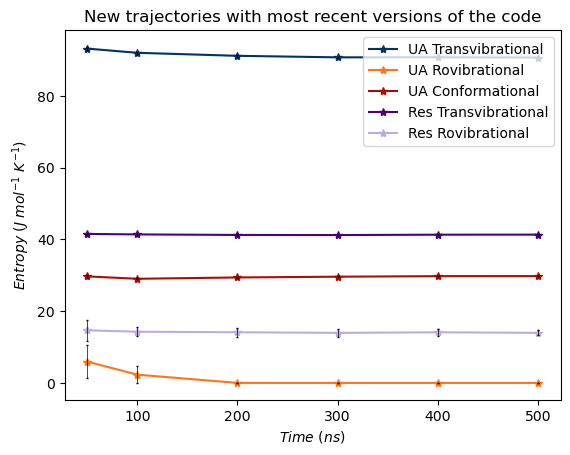

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(times, ua_transvib_values[1:], marker = '*', label = labels[0], color = colors [0])
ax.errorbar(times, ua_transvib_values[1:], ua_transvib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, ua_rovib_values[1:], marker = '*', label = labels[1], color = colors [1])
ax.errorbar(times, ua_rovib_values[1:], ua_rovib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, ua_conf_values[1:], marker = '*', label = labels[2], color = colors [2])
ax.errorbar(times, ua_conf_values[1:], ua_conf_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, res_transvib_values[1:], marker = '*', label = labels[3], color = colors [3])
ax.errorbar(times, res_transvib_values[1:], res_transvib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, res_rovib_values[1:], marker = '*', label = labels[4], color = colors [4])
ax.errorbar(times, res_rovib_values[1:], res_rovib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.set_xlabel("$Time \ (ns)$")
ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")
ax.legend(loc="upper right")
ax.set_title("New trajectories with most recent versions of the code")

fig.savefig("convergence_500ns.png")
plt.show()
plt.close()


### Version we used for thesis

In [ ]:
df_BTN_50_thesis_version_old_traj=pd.read_csv('BTN_50ns_thesis_old_traj.csv')
errors_BTN(df_BTN_50_thesis_version_old_traj)
df_BTN_50_thesis_version_old_traj

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,95.33,96.02,92.66,94.670000,1.774570,1.874480,1.024549
1,UA_Rovib,36.49,37.27,35.16,36.306667,1.066880,2.938524,0.615964
2,UA_Conf,28.05,28.94,28.63,28.540000,0.451774,1.582951,0.260832
3,Res_Transvib,41.48,41.05,41.21,41.246667,0.217332,0.526909,0.125477
4,Res_Rovib,37.06,37.44,36.73,37.076667,0.355293,0.958267,0.205129
5,Total,238.41,240.72,234.39,237.840000,3.203264,1.346815,1.849405


In [ ]:
df_BTN_500_thesis_version=pd.read_csv('BTN_500ns_thesis.csv')
errors_BTN(df_BTN_500_thesis_version)
df_BTN_500_thesis_version

FileNotFoundError: [Errno 2] No such file or directory: 'BTN_500ns_thesis.csv'

In [ ]:
df_BTN_400_thesis_version=pd.read_csv('BTN_400ns_thesis.csv')
errors_BTN(df_BTN_400_thesis_version)
df_BTN_400_thesis_version

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,95.33,96.02,92.66,94.670000,1.774570,1.874480,1.024549
1,UA_Rovib,36.49,37.27,35.16,36.306667,1.066880,2.938524,0.615964
2,UA_Conf,28.05,28.94,28.63,28.540000,0.451774,1.582951,0.260832
3,Res_Transvib,41.48,41.05,41.21,41.246667,0.217332,0.526909,0.125477
4,Res_Rovib,37.06,37.44,36.73,37.076667,0.355293,0.958267,0.205129
5,Total,238.41,240.72,234.39,237.840000,3.203264,1.346815,1.849405


In [ ]:
df_BTN_300_thesis_version=pd.read_csv('BTN_300ns_thesis.csv')
errors_BTN(df_BTN_300_thesis_version)
df_BTN_300_thesis_version

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,95.33,96.02,92.66,94.670000,1.774570,1.874480,1.024549
1,UA_Rovib,36.49,37.27,35.16,36.306667,1.066880,2.938524,0.615964
2,UA_Conf,28.05,28.94,28.63,28.540000,0.451774,1.582951,0.260832
3,Res_Transvib,41.48,41.05,41.21,41.246667,0.217332,0.526909,0.125477
4,Res_Rovib,37.06,37.44,36.73,37.076667,0.355293,0.958267,0.205129
5,Total,238.41,240.72,234.39,237.840000,3.203264,1.346815,1.849405


In [ ]:
df_BTN_200_thesis_version=pd.read_csv('BTN_200ns_thesis.csv')
errors_BTN(df_BTN_200_thesis_version)
df_BTN_200_thesis_version

,Term,Rep_1,Rep_3,Rep_5,Mean,SD,RSD,SE
0,UA_Transvib,95.33,96.02,92.66,94.670000,1.774570,1.874480,1.024549
1,UA_Rovib,36.49,37.27,35.16,36.306667,1.066880,2.938524,0.615964
2,UA_Conf,28.05,28.94,28.63,28.540000,0.451774,1.582951,0.260832
3,Res_Transvib,41.48,41.05,41.21,41.246667,0.217332,0.526909,0.125477
4,Res_Rovib,37.06,37.44,36.73,37.076667,0.355293,0.958267,0.205129
5,Total,238.41,240.72,234.39,237.840000,3.203264,1.346815,1.849405


In [ ]:
df_BTN_100_thesis_version=pd.read_csv('BTN_100ns_thesis.csv')
errors_BTN(df_BTN_100_thesis_version)
df_BTN_100_thesis_version

In [ ]:
df_BTN_50_thesis_version=pd.read_csv('BTN_50ns_thesis.csv')
errors_BTN(df_BTN_50_thesis_version)
df_BTN_50_thesis_version

### Force halving versions

In [ ]:
df_BTN_50_fh_old_traj=pd.read_csv('BTN_50ns_fh_old_traj.csv')
errors_BTN(df_BTN_50_fh_old_traj)
df_BTN_50_fh_old_traj

In [ ]:
df_BTN_500_fh=pd.read_csv('BTN_500ns_fh.csv')
errors_BTN(df_BTN_500_fh)
df_BTN_500_fh

In [ ]:
df_BTN_400_fh=pd.read_csv('BTN_400ns_fh.csv')
errors_BTN(df_BTN_400_fh)
df_BTN_400_fh

In [ ]:
df_BTN_300_fh=pd.read_csv('BTN_300ns_fh.csv')
errors_BTN(df_BTN_300_fh)
df_BTN_300_fh

In [ ]:
df_BTN_200_fh=pd.read_csv('BTN_200ns_fh.csv')
errors_BTN(df_BTN_200_fh)
df_BTN_200_fh

In [ ]:
df_BTN_100_fh=pd.read_csv('BTN_100ns_fh.csv')
errors_BTN(df_BTN_100_fh)
df_BTN_100_fh

In [ ]:
df_BTN_50_fh=pd.read_csv('BTN_50ns_fh.csv')
errors_BTN(df_BTN_50_fh)
df_BTN_50_fh

### Version 0.3 - Argo's code on main branch

In [ ]:
df_BTN_50_main_old_traj=pd.read_csv('BTN_50ns_main_old_traj.csv')
errors_BTN(df_BTN_50_main_old_traj)
df_BTN_50_main_old_traj

In [ ]:
df_BTN_500_main=pd.read_csv('BTN_500ns_main.csv')
errors_BTN(df_BTN_500_main)
df_BTN_500_main

In [ ]:
df_BTN_400_main=pd.read_csv('BTN_400ns_main.csv')
errors_BTN(df_BTN_400_main)
df_BTN_400_main

In [ ]:
df_BTN_300_main=pd.read_csv('BTN_300ns_main.csv')
errors_BTN(df_BTN_300_main)
df_BTN_300_main

In [ ]:
df_BTN_200_main=pd.read_csv('BTN_200ns_main.csv')
errors_BTN(df_BTN_200_main)
df_BTN_200_main

In [ ]:
df_BTN_100_main=pd.read_csv('BTN_100ns_main.csv')
errors_BTN(df_BTN_100_main)
df_BTN_100_main

In [ ]:
df_BTN_50_main=pd.read_csv('BTN_50ns_main.csv')
errors_BTN(df_BTN_50_main)
df_BTN_50_main

### ! 50 ns - different versions !

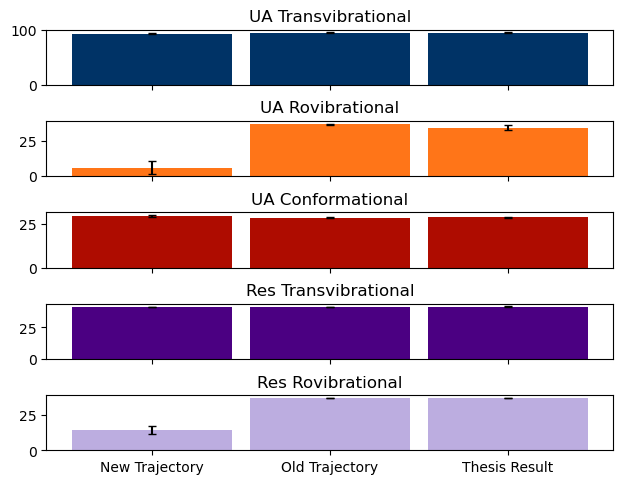

In [ ]:
fig, axs = plt.subplots(5)
fig.tight_layout(h_pad=0.5)
bar_width = 0.9
x_axis = np.array(['New Trajectory', 'Old Trajectory', 'Thesis Result'])
thesis_results =[94.650526, 33.898852, 28.782526, 41.569209, 37.165478]
thesis_errors = [0.715161, 1.735613, 0.508698, 0.215955, 0.147017  ]

for i in range (0, 5):

    axs[i].bar(x_axis,[df_BTN_50.iloc[i]["Mean"], df_BTN_50_old.iloc[i]["Mean"], thesis_results[i]], bar_width, color= colors[i])
    axs[i].errorbar(x_axis, [df_BTN_50.iloc[i]["Mean"], df_BTN_50_old.iloc[i]["Mean"], thesis_results[i]] ,yerr = [df_BTN_50.iloc[i]["SE"], df_BTN_50_old.iloc[i]["SE"], thesis_errors[i]], fmt="none", color="black", capsize = 3)
    axs[i].set_title(labels[i])

#axs[0,0].legend(loc="upper right", fontsize = 10)
#axs[0,1].legend(loc="upper right", fontsize = 10)
for ax in axs.flat:
   ax.label_outer()
plt.show()
fig.savefig("50_bar_charts.png")
plt.close(fig)

In [ ]:
#we can try looking at the energies?


## Streptavidin (unbound)

In [12]:
def average_per_chain(df):
    df["Average Per Chain"] = (df["A"]+df["B"]+df["C"]+df["D"])/4
    SEs = []
    for i in range (0,(len(df)-1)):
        values_array = [df.iloc[i]["A"], df.iloc[i]["B"],df.iloc[i]["C"],df.iloc[i]["D"]]
        SEs.append(stdev(values_array)/math.sqrt(4))
    sum = 0
    for error in SEs:
        sum+=error**2
    SEs.append(math.sqrt(sum))
    df["avg_err"]=SEs

In [ ]:
### TO BE FAIR, we should actually do the UA level errors from the sum of errors per residue!!!!!!!!

def errors_STV (chain,new_column_name,new_df,df_rep1, df_rep2, df_rep3, df_rep4, df_rep5):
    SEs=[]                                                                                                                                                                                                                                                                                         
    for i in range (0,(len(new_df)-1)):
        values_array = [df_rep1.iloc[i][chain],df_rep2.iloc[i][chain], df_rep3.iloc[i][chain],df_rep4.iloc[i][chain],df_rep5.iloc[i][chain]]
        SDs.append(stdev(values_array))
        SEs.append(stdev(values_array)/math.sqrt(5))
    sum_SD = 0
    sum_SE = 0
    for i in range (0,(len(new_df)-1)):
        sum_SD+=SDs[i]**2
        sum_SE+=SEs[i]**2
    SEs.append(math.sqrt(sum_SES))
    new_df[new_column_name]=SEs

In [14]:
def create_avg_dataframe(df_rep1, df_rep2, df_rep3, df_rep4, df_rep5):
    new_df= pd.DataFrame()
    new_df["Term"] = df_rep1["Term"]
    new_df["A"] =(df_rep1["A"]+df_rep2["A"]+df_rep3["A"]+df_rep4["A"]+df_rep5["A"])/5
    errors_STV("A", "A_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["B"] =(df_rep1["B"]+df_rep2["B"]+df_rep3["B"]+df_rep4["B"]+df_rep5["B"])/5
    errors_STV("B", "B_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["C"] =(df_rep1["C"]+df_rep2["C"]+df_rep3["C"]+df_rep4["C"]+df_rep5["C"])/5
    errors_STV("C", "C_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["D"] =(df_rep1["D"]+df_rep2["D"]+df_rep3["D"]+df_rep4["D"]+df_rep5["D"])/5
    errors_STV("D", "D_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["Average per Chain"] = (new_df["A"]+new_df["B"]+new_df["C"]+new_df["D"])/4
    return new_df


### New Code

In [15]:
df_STV1_500=pd.read_csv('STV_BTN_data/STV1_500ns.csv')
average_per_chain(df_STV1_500)
df_STV1_500

,Term,A,B,C,D,Total,Average Per Chain,avg_err
0,UA_Transvib,2202.619684,2200.777389,2242.774309,2255.482801,8901.654182,2225.413546,13.940518
1,UA_Rovib,407.336442,395.729193,411.383254,421.658855,1636.107744,409.026936,5.360390
2,UA_Conf,1586.519101,1571.523259,1546.240886,1419.355089,6123.638336,1530.909584,38.102213
3,Res_Transvib,2450.205533,2453.396042,2512.902463,2492.939079,9909.443117,2477.360779,15.323214
4,Res_Rovib,884.390146,1260.968655,1354.523889,1317.499790,4817.382481,1204.345620,108.372449
5,Res_Conf,70.930816,74.985994,63.578736,69.879617,279.375163,69.843791,2.360722
6,P_Transvib,50.158150,50.036620,50.716060,50.947498,201.858327,50.464582,0.218613
7,P_Rovib,25.014842,26.843287,32.758096,29.452407,114.068632,28.517158,1.681475
8,Total,7677.174714,8034.260440,8214.877693,8057.215135,31983.527982,7995.881996,116.887498


In [17]:
df_STV1_400=pd.read_csv('STV_BTN_data/STV1_400ns.csv')
average_per_chain(df_STV1_400)
df_STV1_300=pd.read_csv('STV_BTN_data/STV1_300ns.csv')
average_per_chain(df_STV1_300)

In [18]:
df_STV1_100=pd.read_csv('STV_BTN_data/STV1_100ns.csv')
average_per_chain(df_STV1_100)
df_STV1_100

,Term,A,B,C,D,Total,Average Per Chain,avg_err
0,UA_Transvib,2298.813464,2286.711211,2328.229222,2314.966773,9228.720670,2307.180167,9.095209
1,UA_Rovib,821.051438,759.152103,861.465439,846.520547,3288.189527,822.047382,22.563848
2,UA_Conf,1513.466103,1480.329088,1440.284449,1349.418250,5783.497890,1445.874472,35.462187
3,Res_Transvib,2621.821073,2625.762520,2732.954372,2647.696114,10628.234079,2657.058520,25.930921
4,Res_Rovib,1936.915063,1936.283481,1986.228194,1709.311594,7568.738332,1892.184583,62.070027
5,Res_Conf,50.837727,60.763846,50.451995,53.125750,215.179318,53.794830,2.396766
6,P_Transvib,49.947121,50.319340,50.418120,50.775353,201.459933,50.364983,0.170274
7,P_Rovib,31.931452,33.495388,44.933326,28.016687,138.376853,34.594213,3.633855
8,Total,9324.783441,9232.816976,9494.965116,8999.831068,37052.396602,9263.099150,79.959340


In [19]:
df_STV1_200=pd.read_csv('STV_BTN_data/STV1_200ns.csv')
average_per_chain(df_STV1_200)
df_STV1_200

,Term,A,B,C,D,Total,Average Per Chain,avg_err
0,UA_Transvib,2256.283547,2237.486968,2288.726353,2272.705210,9055.202077,2263.800519,10.990521
1,UA_Rovib,569.656686,564.218189,582.029047,576.042149,2291.946070,572.986518,3.863025
2,UA_Conf,1544.358776,1510.635798,1456.242273,1364.685260,5875.922108,1468.980527,39.218201
3,Res_Transvib,2508.765242,2505.239804,2604.699335,2548.047452,10166.751833,2541.687958,23.135921
4,Res_Rovib,1498.801313,1742.475679,1787.159174,1516.679764,6545.115931,1636.278983,74.859119
5,Res_Conf,61.338733,67.666955,52.084179,58.250679,239.340546,59.835136,3.242761
6,P_Transvib,49.972156,50.185848,50.577201,50.854343,201.589548,50.397387,0.197212
7,P_Rovib,27.498462,28.744524,38.906587,28.152043,123.301616,30.825404,2.705719
8,Total,8516.674914,8706.653764,8860.424150,8415.416900,34499.169728,8624.792432,88.491896


In [20]:
df_STV1_50=pd.read_csv('STV_BTN_data/STV1_50ns.csv')
average_per_chain(df_STV1_50)
df_STV1_50

,Term,A,B,C,D,Total,Average Per Chain,avg_err
0,UA_Transvib,2361.490462,2360.530598,2379.681461,2380.740802,9482.443324,2370.610831,5.550412
1,UA_Rovib,1068.871132,1022.192536,1130.572250,1124.218893,4345.854811,1086.463703,25.513558
2,UA_Conf,1484.196735,1442.706251,1417.738314,1315.067021,5659.708321,1414.927080,35.997572
3,Res_Transvib,2872.420677,2852.481153,2935.772481,2853.315910,11513.990221,2878.497555,19.639064
4,Res_Rovib,2339.236149,2180.406705,2200.034041,2182.302566,8901.979461,2225.494865,38.170506
5,Res_Conf,51.623970,54.074513,39.558861,40.130475,185.387818,46.346955,3.789073
6,P_Transvib,49.731252,50.021917,50.156373,50.649416,200.558959,50.139740,0.191658
7,P_Rovib,38.791524,38.417573,45.614813,32.390991,155.214901,38.803725,2.702828
8,Total,10266.361900,10000.831246,10199.128594,9978.816076,40445.137816,10111.284454,61.983492


In [21]:
df_STV2_500=pd.read_csv('STV_BTN_data/STV2_500ns.csv')
average_per_chain(df_STV2_500)
#df_STV2_400=pd.read_csv('STV_BTN_data/STV2_400ns.csv')
#average_per_chain(df_STV2_400)
#df_STV2_300=pd.read_csv('STV_BTN_data/STV2_300ns.csv')
#average_per_chain(df_STV2_300)
#df_STV2_200=pd.read_csv('STV_BTN_data/STV2_200ns.csv')
#average_per_chain(df_STV2_200)
#df_STV2_100=pd.read_csv('STV_BTN_data/STV2_100ns.csv')
#average_per_chain(df_STV2_100)
#df_STV2_50=pd.read_csv('STV_BTN_data/STV2_50ns.csv')
#average_per_chain(df_STV2_50)

#df_STV3_500=pd.read_csv('STV_BTN_data/STV3_500ns.csv')
#average_per_chain(df_STV3_500)
df_STV3_400=pd.read_csv('STV_BTN_data/STV3_400ns.csv')
average_per_chain(df_STV3_400)
df_STV3_300=pd.read_csv('STV_BTN_data/STV3_300ns.csv')
average_per_chain(df_STV3_300)
df_STV3_200=pd.read_csv('STV_BTN_data/STV3_200ns.csv')
average_per_chain(df_STV3_200)
df_STV3_100=pd.read_csv('STV_BTN_data/STV3_100ns.csv')
average_per_chain(df_STV3_100)
df_STV3_50=pd.read_csv('STV_BTN_data/STV3_50ns.csv')
average_per_chain(df_STV3_50)


#df_STV4_500=pd.read_csv('STV_BTN_data/STV4_500ns.csv')
#average_per_chain(df_STV4_500)
#df_STV4_400=pd.read_csv('STV_BTN_data/STV4_400ns.csv')
#average_per_chain(df_STV4_400)
df_STV4_300=pd.read_csv('STV_BTN_data/STV4_300ns.csv')
average_per_chain(df_STV4_300)
df_STV4_200=pd.read_csv('STV_BTN_data/STV4_200ns.csv')
average_per_chain(df_STV4_200)
df_STV4_100=pd.read_csv('STV_BTN_data/STV4_100ns.csv')
average_per_chain(df_STV4_100)
df_STV4_50=pd.read_csv('STV_BTN_data/STV4_50ns.csv')
average_per_chain(df_STV4_50)

#df_STV5_500=pd.read_csv('STV_BTN_data/STV5_500ns.csv')
#average_per_chain(df_STV5_500)
#df_STV5_400=pd.read_csv('STV_BTN_data/STV5_400ns.csv')
#average_per_chain(df_STV5_400)
#df_STV5_300=pd.read_csv('STV_BTN_data/STV5_300ns.csv')
#average_per_chain(df_STV5_300)
#df_STV5_200=pd.read_csv('STV_BTN_data/STV5_200ns.csv')
#average_per_chain(df_STV5_200)
#df_STV5_100=pd.read_csv('STV_BTN_data/STV5_100ns.csv')
#average_per_chain(df_STV5_100)
#df_STV5_50=pd.read_csv('STV_BTN_data/STV5_50ns.csv')
#average_per_chain(df_STV5_50)

In [22]:
STV_ua_transvib_values = np.array([df_STV1_50.iloc[0]["Average Per Chain"], df_STV1_100.iloc[0]["Average Per Chain"],df_STV1_200.iloc[0]["Average Per Chain"], df_STV1_300.iloc[0]["Average Per Chain"],df_STV1_400.iloc[0]["Average Per Chain"], df_STV1_500.iloc[0]["Average Per Chain"]])
#STV_ua_transvib_errors = np.array([df_BTN_50_old.iloc[0]["Mean"], df_BTN_50.iloc[0]["SE"], df_BTN_100.iloc[0]["SE"],df_BTN_200.iloc[0]["SE"], df_BTN_300.iloc[0]["SE"], df_BTN_400.iloc[0]["SE"], df_BTN_500.iloc[0]["SE"]])

STV_ua_rovib_values = np.array([df_STV1_50.iloc[1]["Average Per Chain"], df_STV1_100.iloc[1]["Average Per Chain"],df_STV1_200.iloc[1]["Average Per Chain"], df_STV1_300.iloc[1]["Average Per Chain"], df_STV1_400.iloc[1]["Average Per Chain"], df_STV1_500.iloc[1]["Average Per Chain"]])
#STV_ua_rovib_errors = np.array([df_BTN_50_old.iloc[1]["SE"], df_BTN_50.iloc[1]["SE"], df_BTN_100.iloc[1]["SE"],df_BTN_200.iloc[1]["SE"], df_BTN_300.iloc[1]["SE"], df_BTN_400.iloc[1]["SE"], df_BTN_500.iloc[1]["SE"]])

STV_ua_conf_values= np.array([df_STV1_50.iloc[2]["Average Per Chain"],  df_STV1_100.iloc[2]["Average Per Chain"],df_STV1_200.iloc[2]["Average Per Chain"], df_STV1_300.iloc[2]["Average Per Chain"], df_STV1_400.iloc[2]["Average Per Chain"],df_STV1_500.iloc[2]["Average Per Chain"]])
#ua_conf_errors= np.array([df_BTN_50_old.iloc[2]["SE"], df_BTN_50.iloc[2]["SE"], df_BTN_100.iloc[2]["SE"],df_BTN_200.iloc[2]["SE"], df_BTN_300.iloc[2]["SE"], df_BTN_400.iloc[2]["SE"], df_BTN_500.iloc[2]["SE"]])

STV_res_transvib_values = np.array([df_STV1_50.iloc[3]["Average Per Chain"],  df_STV1_100.iloc[3]["Average Per Chain"],df_STV1_200.iloc[3]["Average Per Chain"], df_STV1_300.iloc[3]["Average Per Chain"], df_STV1_400.iloc[3]["Average Per Chain"],  df_STV1_500.iloc[3]["Average Per Chain"]])
#res_transvib_errors = np.array([df_BTN_50_old.iloc[3]["SE"], df_BTN_50.iloc[3]["SE"], df_BTN_100.iloc[3]["SE"],df_BTN_200.iloc[3]["SE"], df_BTN_300.iloc[3]["SE"], df_BTN_400.iloc[3]["SE"], df_BTN_500.iloc[3]["SE"]])

STV_res_rovib_values = np.array([df_STV1_50.iloc[4]["Average Per Chain"],  df_STV1_100.iloc[4]["Average Per Chain"],df_STV1_200.iloc[4]["Average Per Chain"], df_STV1_300.iloc[4]["Average Per Chain"], df_STV1_400.iloc[4]["Average Per Chain"], df_STV1_500.iloc[4]["Average Per Chain"]])
#res_rovib_errors = np.array([df_BTN_50_old.iloc[4]["SE"], df_BTN_50.iloc[4]["SE"], df_BTN_100.iloc[4]["SE"],df_BTN_200.iloc[4]["SE"], df_BTN_300.iloc[4]["SE"], df_BTN_400.iloc[4]["SE"], df_BTN_500.iloc[4]["SE"]])

STV_res_conf_values = np.array([df_STV1_50.iloc[5]["Average Per Chain"],  df_STV1_100.iloc[5]["Average Per Chain"],df_STV1_200.iloc[5]["Average Per Chain"], df_STV1_300.iloc[5]["Average Per Chain"], df_STV1_400.iloc[5]["Average Per Chain"], df_STV1_500.iloc[5]["Average Per Chain"]])

STV_p_transvib_values = np.array([df_STV1_50.iloc[6]["Average Per Chain"],  df_STV1_100.iloc[6]["Average Per Chain"],df_STV1_200.iloc[6]["Average Per Chain"], df_STV1_300.iloc[6]["Average Per Chain"], df_STV1_400.iloc[6]["Average Per Chain"], df_STV1_500.iloc[6]["Average Per Chain"]])

STV_p_rovib_values = np.array([df_STV1_50.iloc[7]["Average Per Chain"], df_STV1_100.iloc[7]["Average Per Chain"],df_STV1_200.iloc[7]["Average Per Chain"], df_STV1_300.iloc[7]["Average Per Chain"], df_STV1_400.iloc[7]["Average Per Chain"], df_STV1_500.iloc[7]["Average Per Chain"]])

times = np.array([50, 100, 200, 300, 400, 500])
labels = ["UA Transvibrational", "UA Rovibrational", "UA Conformational", "Res Transvibrational", "Res Rovibrational", "Res Conformational", "Polymer Transvibrational", "Polymer Rovibrational" ]

<>:27: SyntaxWarning: invalid escape sequence '\ '
<>:28: SyntaxWarning: invalid escape sequence '\ '
<>:27: SyntaxWarning: invalid escape sequence '\ '
<>:28: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_8462/4290434496.py:27: SyntaxWarning: invalid escape sequence '\ '
  ax.set_xlabel("$Time \ (ns)$")
/tmp/ipykernel_8462/4290434496.py:28: SyntaxWarning: invalid escape sequence '\ '
  ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")


<Figure size 640x480 with 0 Axes>

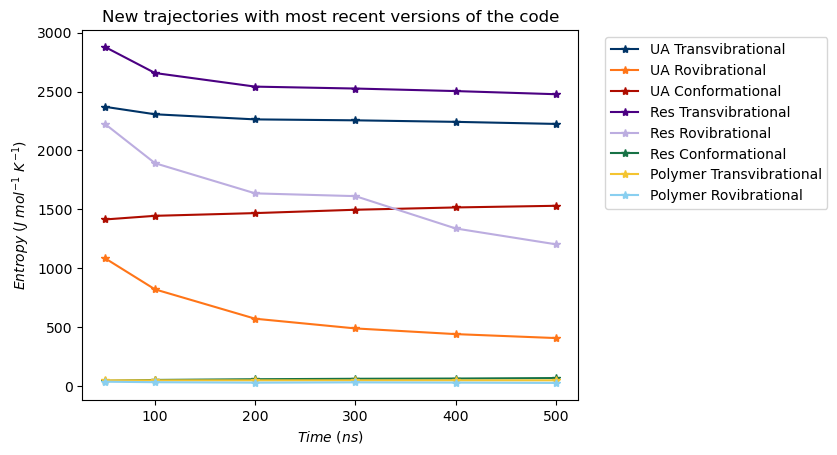

In [23]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(times, STV_ua_transvib_values, marker = '*', label = labels[0], color = colors [0])
#ax.errorbar(times, ua_transvib_values[1:], ua_transvib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_ua_rovib_values, marker = '*', label = labels[1], color = colors [1])
#ax.errorbar(times, ua_rovib_values[1:], ua_rovib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_ua_conf_values, marker = '*', label = labels[2], color = colors [2])
#ax.errorbar(times, ua_conf_values[1:], ua_conf_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_res_transvib_values, marker = '*', label = labels[3], color = colors [3])
#ax.errorbar(times, res_transvib_values[1:], res_transvib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_res_rovib_values, marker = '*', label = labels[4], color = colors [4])
#ax.errorbar(times, res_rovib_values[1:], res_rovib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_res_conf_values, marker = '*', label = labels[5], color = colors [5])

ax.plot(times, STV_p_transvib_values, marker = '*', label = labels[6], color = colors [6])

ax.plot(times, STV_p_rovib_values, marker = '*', label = labels[7], color = colors [7])




ax.set_xlabel("$Time \ (ns)$")
ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title("New trajectories with most recent versions of the code")

fig.savefig("STV_convergence_500ns.png")
plt.show()
plt.close()


### Most Recent Code Old Trajectory


In [24]:
df_STV1_50_old_traj=pd.read_csv('STV_BTN_data/STV1_50ns_old_traj.csv')
average_per_chain(df_STV1_50_old_traj)
df_STV2_50_old_traj=pd.read_csv('STV_BTN_data/STV2_50ns_old_traj.csv')
average_per_chain(df_STV2_50_old_traj)
df_STV3_50_old_traj=pd.read_csv('STV_BTN_data/STV3_50ns_old_traj.csv')
average_per_chain(df_STV3_50_old_traj)
df_STV4_50_old_traj=pd.read_csv('STV_BTN_data/STV4_50ns_old_traj.csv')
average_per_chain(df_STV4_50_old_traj)
df_STV5_50_old_traj=pd.read_csv('STV_BTN_data/STV5_50ns_old_traj.csv')
average_per_chain(df_STV5_50_old_traj)


### Older Code Old Trajectory

In [25]:
df_STV1_50_thesis_version=pd.read_csv('STV_BTN_data/STV1_50ns_thesis.csv')
average_per_chain(df_STV1_50_thesis_version)


df_STV2_50_thesis_version=pd.read_csv('STV_BTN_data/STV2_50ns_thesis_old_traj.csv')
average_per_chain(df_STV2_50_thesis_version)


df_STV3_50_thesis_version=pd.read_csv('STV_BTN_data/STV3_50ns_thesis_old_traj.csv')
average_per_chain(df_STV3_50_thesis_version)


df_STV4_50_thesis_version=pd.read_csv('STV_BTN_data/STV4_50ns_thesis_old_traj.csv')
average_per_chain(df_STV4_50_thesis_version)


df_STV5_50_thesis_version=pd.read_csv('STV_BTN_data/STV5_50ns_thesis_old_traj.csv')
average_per_chain(df_STV5_50_thesis_version)


In [26]:
df_STV_50_thesis_version_AVG = create_avg_dataframe(df_STV1_50_thesis_version,df_STV2_50_thesis_version, df_STV3_50_thesis_version, df_STV4_50_thesis_version, df_STV5_50_thesis_version)
df_STV_50_thesis_version_AVG

TypeError: must be real number, not builtin_function_or_method

### CodeEntropy 0.3 New 50ns Trajectory

### CodeEntropy 0.3 Old 50ns Trajectory

### Force Halving Version

In [ ]:
#df_STV1_500_fh=pd.read_csv('STV_BTN_data/STV1_500ns_fh.csv')
#df_STV1_400_fh=pd.read_csv('STV1_400ns_fh.csv')
df_STV1_300_fh=pd.read_csv('STV_BTN_data/STV1_300ns_fh.csv')
df_STV1_200_fh=pd.read_csv('STV_BTN_data/STV1_200ns_fh.csv')
df_STV1_100_fh=pd.read_csv('STV_BTN_data/STV1_100ns_fh.csv')
df_STV1_50_fh=pd.read_csv('STV_BTN_data/STV1_50ns_fh.csv')

#df_STV2_500_fh=pd.read_csv('STV_BTN_data/STV2_500ns_fh.csv')
df_STV2_400_fh=pd.read_csv('STV_BTN_data/STV2_400ns_fh.csv')
df_STV2_300_fh=pd.read_csv('STV_BTN_data/STV2_300ns_fh.csv')
df_STV2_200_fh=pd.read_csv('STV_BTN_data/STV2_200ns_fh.csv')
df_STV2_100_fh=pd.read_csv('STV_BTN_data/STV2_100ns_fh.csv')
df_STV2_50_fh=pd.read_csv('STV_BTN_data/STV2_50ns_fh.csv')

#df_STV3_500_fh=pd.read_csv('STV_BTN_data/STV3_500ns_fh.csv')
df_STV3_400_fh=pd.read_csv('STV_BTN_data/STV3_400ns_fh.csv')
df_STV3_300_fh=pd.read_csv('STV_BTN_data/STV3_300ns_fh.csv')
df_STV3_200_fh=pd.read_csv('STV_BTN_data/STV3_200ns_fh.csv')
df_STV3_100_fh=pd.read_csv('STV_BTN_data/STV3_100ns_fh.csv')
df_STV3_50_fh=pd.read_csv('STV_BTN_data/STV3_50ns_fh.csv')

#df_STV4_500_fh=pd.read_csv('STV_BTN_data/STV4_500ns_fh.csv')
df_STV4_400_fh=pd.read_csv('STV_BTN_data/STV4_400ns_fh.csv')
df_STV4_300_fh=pd.read_csv('STV_BTN_data/STV4_300ns_fh.csv')
df_STV4_200_fh=pd.read_csv('STV_BTN_data/STV4_200ns_fh.csv')
df_STV4_100_fh=pd.read_csv('STV_BTN_data/STV4_100ns_fh.csv')
df_STV4_50_fh=pd.read_csv('STV_BTN_data/STV4_50ns_fh.csv')

#df_STV5_500_fh=pd.read_csv('STV_BTN_data/STV5_500ns_fh.csv')
df_STV5_400_fh=pd.read_csv('STV_BTN_data/STV5_400ns_fh.csv')
df_STV5_300_fh=pd.read_csv('STV_BTN_data/STV5_300ns_fh.csv')
df_STV5_200_fh=pd.read_csv('STV_BTN_data/STV5_200ns_fh.csv')
df_STV5_100_fh=pd.read_csv('STV_BTN_data/STV5_100ns_fh.csv')
df_STV5_50_fh=pd.read_csv('STV_BTN_data/STV5_50ns_fh.csv')

### Different versions of 50 ns

In [ ]:
def plot_50ns_histograms (column, error_column, fig_name):
    fig, axs = plt.subplots(4,2)
    fig.tight_layout(h_pad=0.8)
    bar_width = 0.5
    x_axis = np.array(['New Trajectory', 'Old Trajectory, Older Code', 'Old Trajectory, Most Recent Code'])

    for i in range (0, 4):
        axs[i][0].bar(x_axis,[df_STV_50_AVG.iloc[i][column], df_STV_50_thesis_version_AVG.iloc[i][column], df_STV_50_old_traj_AVG.iloc[i][column]], bar_width, color= colors[i])
        axs[i][0].errorbar(x_axis, [df_STV_50_AVG.iloc[i][column], df_STV_50_thesis_version_AVG.iloc[i][column], df_STV_50_old_traj_AVG.iloc[i][column]] ,yerr = [df_STV_50_AVG.iloc[i][error_column], df_STV_50_thesis_version_AVG.iloc[i][error_column], df_STV_50_old_traj_AVG.iloc[i][error_column]], fmt="none", color="black", capsize = 3)
        axs[i][0].set_title(labels[i])

    for i in range (0, 4):

        axs[i][1].bar(x_axis,np.array([df_STV1_50.iloc[i+4][column], df_STV1_50_thesis_version.iloc[i+4][column],df_STV_50_old_traj_AVG.iloc[i+4][column]]), bar_width, color= colors[i+4])
        axs[i][1].errorbar(x_axis, [df_STV_50_AVG.iloc[i+4][column], df_STV_50_thesis_version_AVG.iloc[i+4][column], df_STV_50_old_traj_AVG.iloc[i+4][column]] ,yerr = [df_STV_50_AVG.iloc[i+4][error_column], df_STV_50_thesis_version_AVG.iloc[i+4][error_column], df_STV_50_old_traj_AVG.iloc[i+4][error_column]], fmt="none", color="black", capsize = 3)
        axs[i][1].set_title(labels[i+4])

    #axs[0,0].legend(loc="upper right", fontsize = 10)
    #axs[0,1].legend(loc="upper right", fontsize = 10)
    for ax in axs.flat:
        ax.label_outer()
    plt.show()
    fig.savefig(fig_name)
    plt.close(fig)

In [ ]:
plot_50ns_histograms("Average Per Chain, "avg_err", "AvgPerChain_50ns_comparison")

SyntaxError: unterminated string literal (detected at line 1) (784850482.py, line 1)